In [1]:
import pandas as pd

df = pd.read_csv('RTA Dataset.csv')
display(df.head())

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
print(f"DataFrame shape: {df.shape}")
print("\nData types of each column:")
print(df.dtypes)

print("\nDescriptive statistics for numerical features:")
display(df.describe())

print("\nNumber of missing values in each column:")
print(df.isnull().sum())

print("\nColumns related to road conditions, weather, and time of day:")
relevant_columns = [
    "Road_surface_type",
    "Road_surface_conditions",
    "Light_conditions",
    "Weather_conditions",
    "Time",
    "Day_of_week",
]
print(relevant_columns)

DataFrame shape: (12316, 32)

Data types of each column:
Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000



Number of missing values in each column:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity     

In [ ]:
relevant_columns = [
    "Road_surface_type",
    "Road_surface_conditions",
    "Light_conditions",
    "Weather_conditions",
    "Time",
    "Day_of_week",
]
missing_values = df[relevant_columns].isnull().sum()
print("Missing values in relevant columns:\n", missing_values)

for column in relevant_columns:
    if df[column].dtype == object:
        df[column].fillna(df[column].mode()[0], inplace=True)

missing_values_after_handling = df[relevant_columns].isnull().sum()
print("\nMissing values after handling:\n", missing_values_after_handling)

Missing values in relevant columns:
 Road_surface_type          172
Road_surface_conditions      0
Light_conditions             0
Weather_conditions           0
Time                         0
Day_of_week                  0
dtype: int64

Missing values after handling:
 Road_surface_type          0
Road_surface_conditions    0
Light_conditions           0
Weather_conditions         0
Time                       0
Day_of_week                0
dtype: int64


<ipython-input-3-3f8f82293210>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


**Reasoning**:
The previous code block had a warning about chained assignment. We can fix this by directly assigning the filled values to the respective columns. Also, we can check for outliers and handle them.



In [ ]:
relevant_columns = [
    "Road_surface_type",
    "Road_surface_conditions",
    "Light_conditions",
    "Weather_conditions",
    "Time",
    "Day_of_week",
]
missing_values = df[relevant_columns].isnull().sum()
print("Missing values in relevant columns:\n", missing_values)

for column in relevant_columns:
    if df[column].dtype == object:
        df[column] = df[column].fillna(df[column].mode()[0])

missing_values_after_handling = df[relevant_columns].isnull().sum()
print("\nMissing values after handling:\n", missing_values_after_handling)

Missing values in relevant columns:
 Road_surface_type          0
Road_surface_conditions    0
Light_conditions           0
Weather_conditions         0
Time                       0
Day_of_week                0
dtype: int64

Missing values after handling:
 Road_surface_type          0
Road_surface_conditions    0
Light_conditions           0
Weather_conditions         0
Time                       0
Day_of_week                0
dtype: int64


In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

def categorize_road_condition(condition):
    if condition in ['Dry', 'Wet or damp']:
        return 'Good'
    elif condition == 'Flood over 3cm. deep':
        return 'Poor'
    else:
        return 'Fair'

df['Road_Condition_Category'] = df['Road_surface_conditions'].apply(categorize_road_condition)

In [ ]:
categorical_features = ['Day_of_week', 'Weather_conditions', 'Road_surface_type', 'Light_conditions', 'Road_Condition_Category']
df = pd.get_dummies(df, columns=categorical_features, prefix=categorical_features)

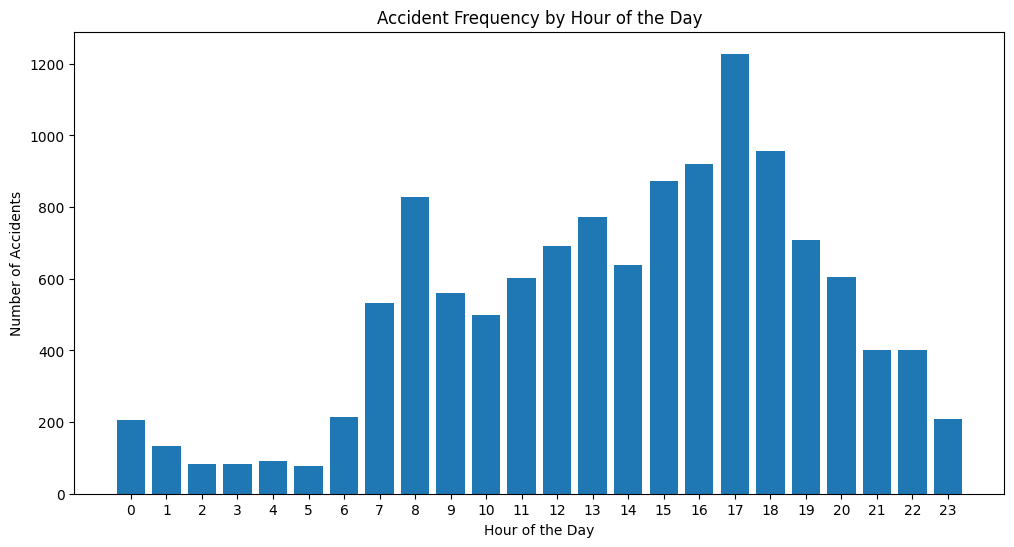

In [ ]:
import matplotlib.pyplot as plt

hourly_accidents = df.groupby('Hour')['Accident_severity'].count()

plt.figure(figsize=(12, 6))
plt.bar(hourly_accidents.index, hourly_accidents.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Accident Frequency by Hour of the Day')
plt.xticks(range(24))
plt.show()

**Reasoning**:
Analyze accident frequency by road condition by grouping the data by 'Road_Condition_Category' and calculate the number of accidents for each category, then create a bar chart to visualize the distribution of accidents across road conditions.



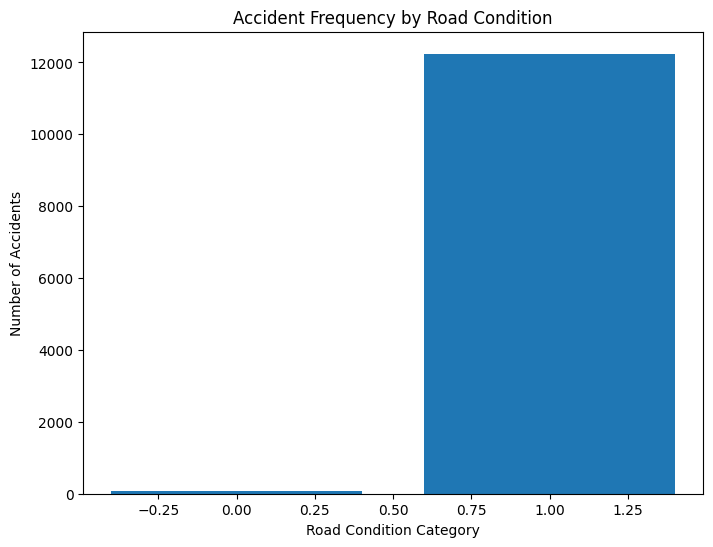

In [ ]:
road_condition_accidents = df.groupby('Road_Condition_Category_Good')['Accident_severity'].count()

plt.figure(figsize=(8, 6))
plt.bar(road_condition_accidents.index, road_condition_accidents.values)
plt.xlabel('Road Condition Category')
plt.ylabel('Number of Accidents')
plt.title('Accident Frequency by Road Condition')
plt.show()

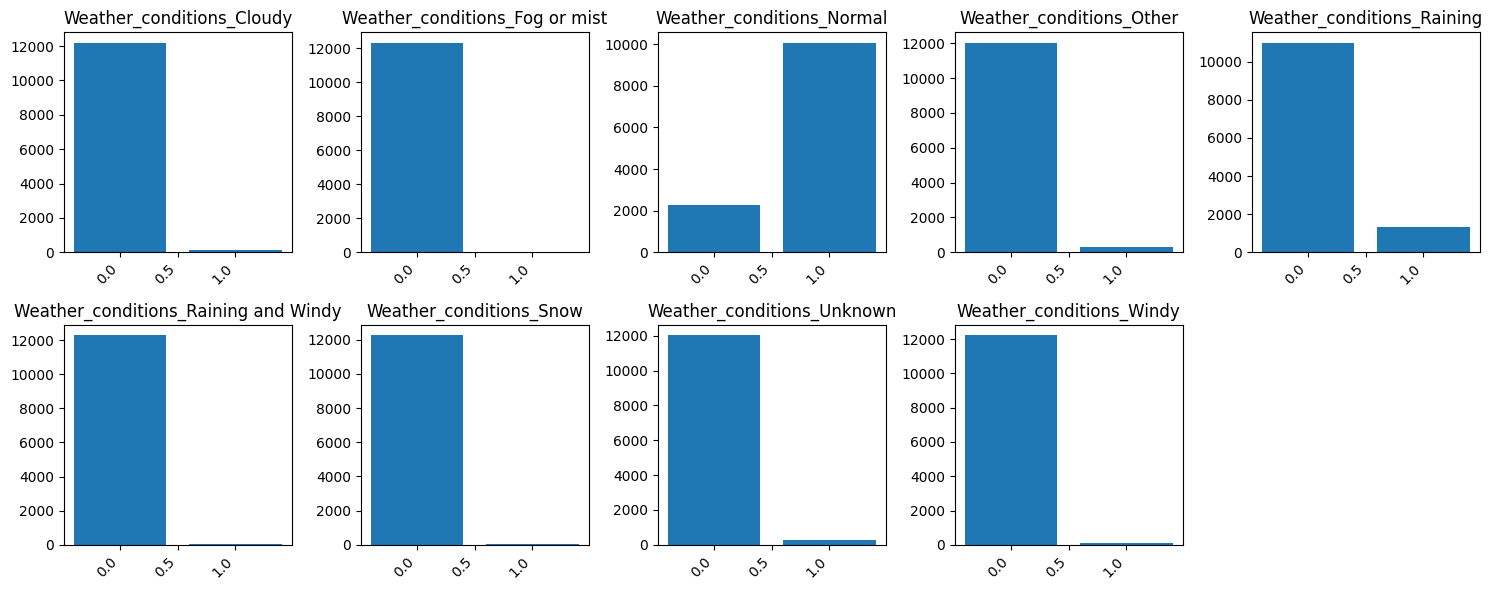

In [ ]:
weather_columns = [
    'Weather_conditions_Cloudy',
    'Weather_conditions_Fog or mist',
    'Weather_conditions_Normal',
    'Weather_conditions_Other',
    'Weather_conditions_Raining',
    'Weather_conditions_Raining and Windy',
    'Weather_conditions_Snow',
    'Weather_conditions_Unknown',
    'Weather_conditions_Windy',
]

weather_accidents = df.groupby(weather_columns)['Accident_severity'].count()

plt.figure(figsize=(15, 6))
for i, column in enumerate(weather_columns):
    plt.subplot(2, 5, i + 1)
    weather_accidents_by_column = df.groupby(column)['Accident_severity'].count()
    plt.bar(weather_accidents_by_column.index, weather_accidents_by_column.values)
    plt.title(column)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

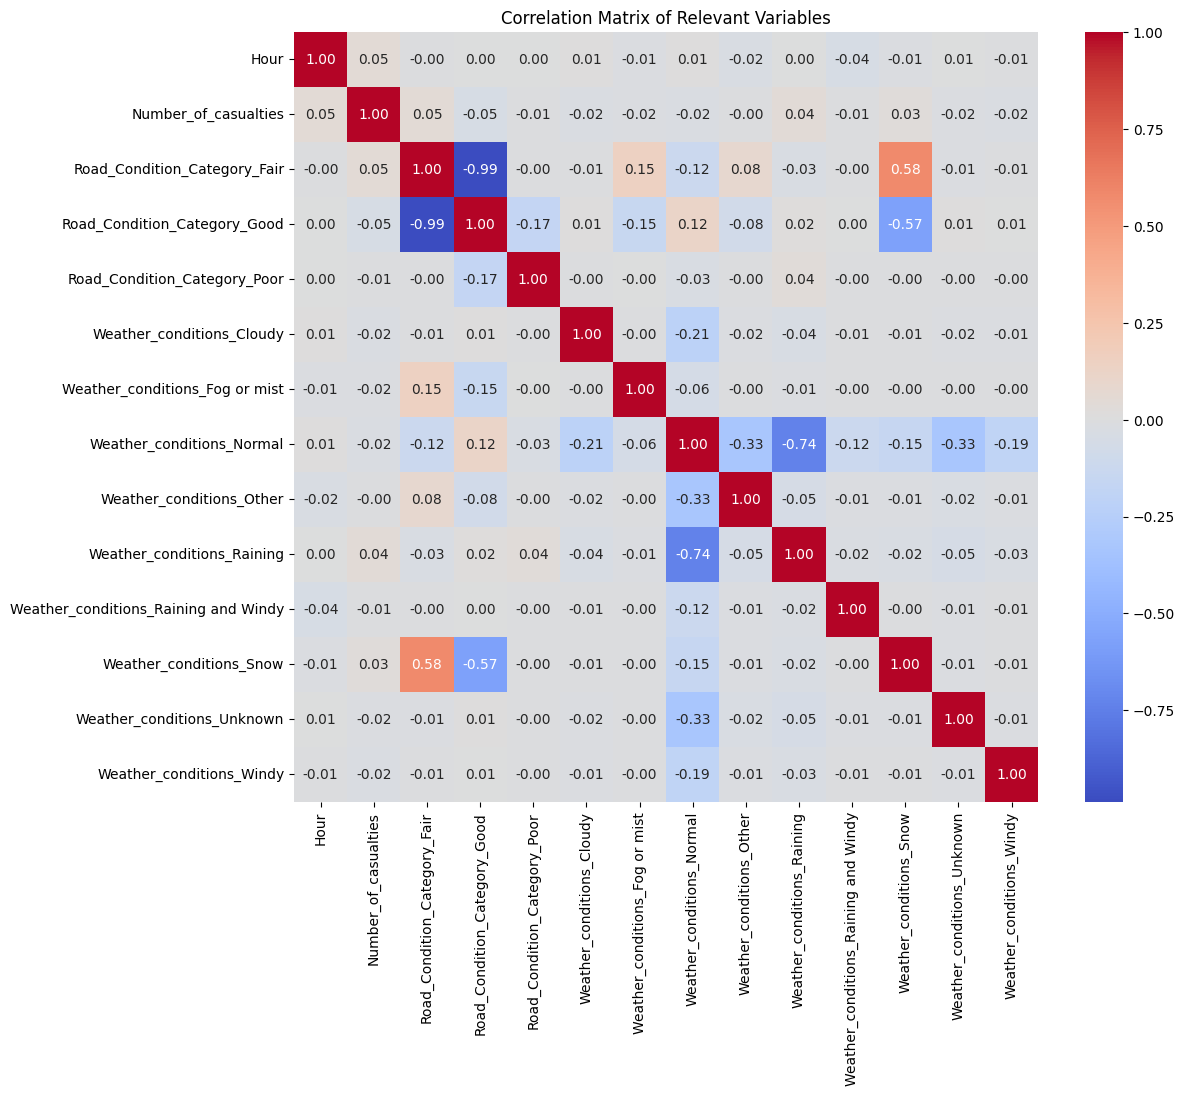

In [ ]:
import numpy as np
import seaborn as sns

relevant_columns = ['Hour', 'Number_of_casualties'] + [
    col for col in df.columns if 'Road_Condition_Category' in col
] + [col for col in df.columns if 'Weather_conditions' in col]

correlation_matrix = df[relevant_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Relevant Variables')
plt.show()

**Reasoning**:
Since the download of the world map shapefile failed, I will attempt to create a basic visualization based on the number of casualties in different areas without using geographical coordinates. I will use a bar chart to show the accident density by area.



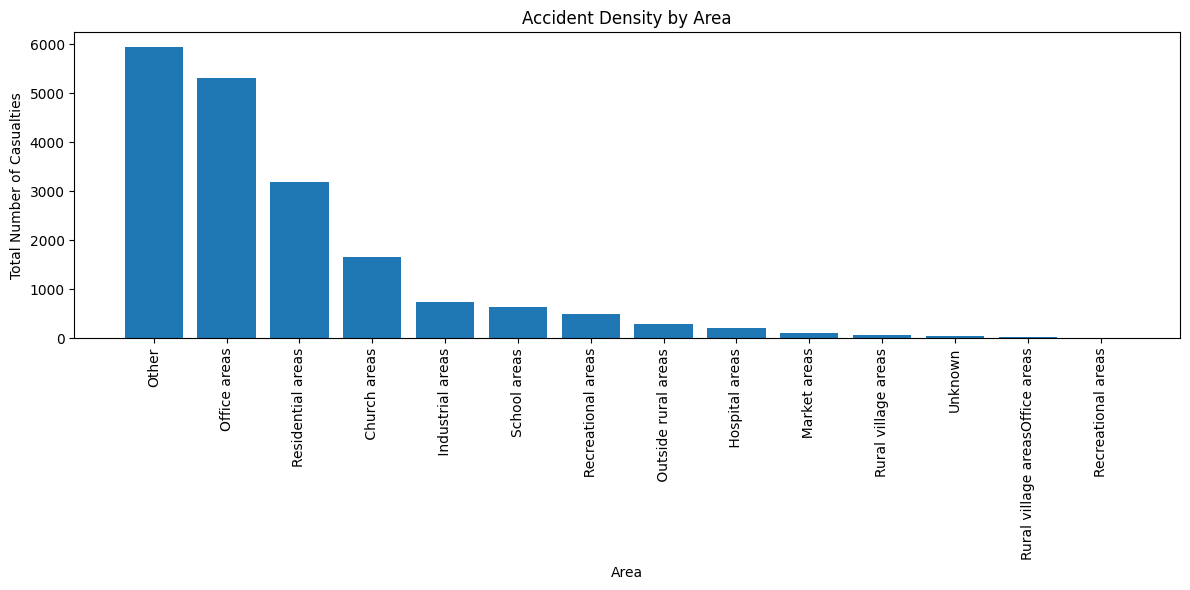

In [ ]:
import matplotlib.pyplot as plt

# Group the dataframe by 'Area_accident_occured' and sum the 'Number_of_casualties'
area_casualties = df.groupby('Area_accident_occured')['Number_of_casualties'].sum()

# Sort the areas by the number of casualties in descending order
area_casualties = area_casualties.sort_values(ascending=False)

# Create a bar chart to visualize accident density by area
plt.figure(figsize=(12, 6))
plt.bar(area_casualties.index, area_casualties.values)
plt.xlabel('Area')
plt.ylabel('Total Number of Casualties')
plt.title('Accident Density by Area')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

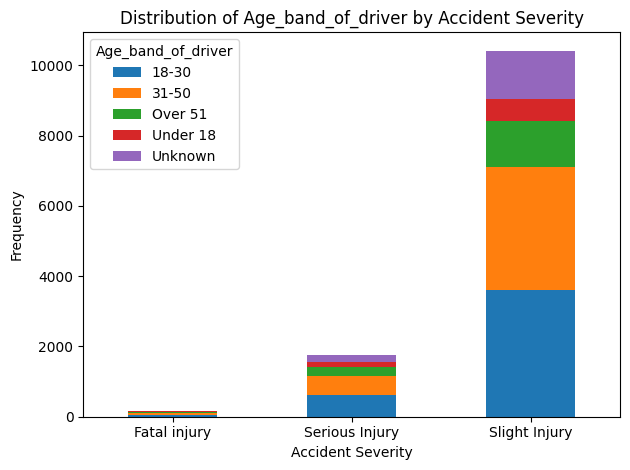

<Figure size 1200x600 with 0 Axes>

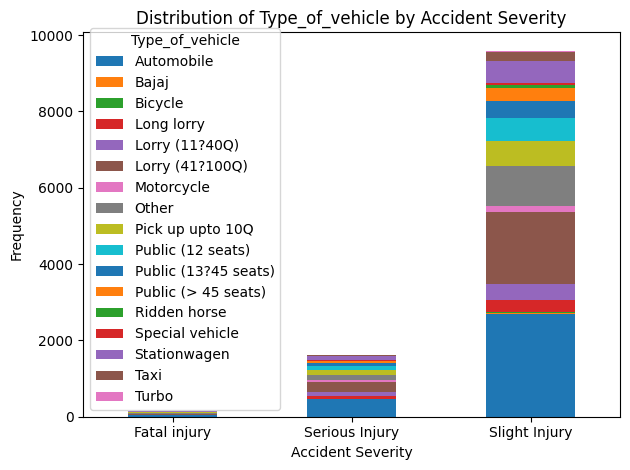

<Figure size 1200x600 with 0 Axes>

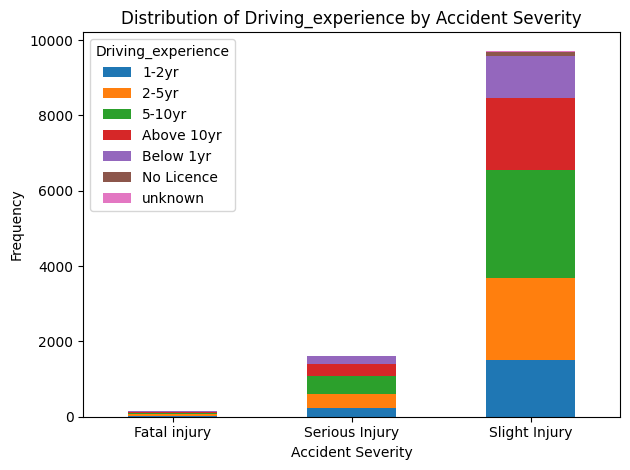

In [ ]:
import matplotlib.pyplot as plt

# Contributing factors to analyze (example)
contributing_factors = ['Age_band_of_driver', 'Type_of_vehicle', 'Driving_experience']

# Iterate through contributing factors and create visualizations
for factor in contributing_factors:
    # Group by accident severity and the contributing factor
    severity_factor_counts = df.groupby(['Accident_severity', factor])[factor].count().unstack()

    # Create a bar chart to visualize the distribution of the contributing factor across accident severity levels
    plt.figure(figsize=(12, 6))
    severity_factor_counts.plot(kind='bar', stacked=True)
    plt.xlabel('Accident Severity')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {factor} by Accident Severity')
    plt.xticks(rotation=0)
    plt.legend(title=factor)
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Select specific accident severity levels for comparison (e.g., Fatal, Serious)
severity_levels_to_compare = ['Fatal', 'Serious']

# Contributing factors to analyze (example)
contributing_factors = ['Age_band_of_driver', 'Type_of_vehicle', 'Driving_experience']

# Iterate through contributing factors and create visualizations
for factor in contributing_factors:
    # Filter the dataframe to include only the selected severity levels
    filtered_df = df[df['Accident_severity'].isin(severity_levels_to_compare)]

    # Group by accident severity and the contributing factor, then calculate proportions
    severity_factor_counts = filtered_df.groupby(['Accident_severity', factor])['Accident_severity'].count().unstack()

    # Check if severity_factor_counts is not empty and contains numeric data
    if severity_factor_counts is not None and not severity_factor_counts.empty and severity_factor_counts.apply(lambda x: pd.api.types.is_numeric_dtype(x)).all():
        severity_factor_proportions = severity_factor_counts.div(severity_factor_counts.sum(axis=1), axis=0)

        # Create a stacked bar chart to visualize the distribution of the contributing factor across the selected severity levels
        plt.figure(figsize=(12, 6))

        # Convert index to string to avoid potential issues with non-numeric index
        severity_factor_proportions.index = severity_factor_proportions.index.astype(str)

        severity_factor_proportions.plot(kind='bar', stacked=True)
        plt.xlabel('Accident Severity')
        plt.ylabel('Proportion')
        plt.title(f'Proportion of {factor} by Accident Severity (Fatal vs. Serious)')
        plt.xticks(rotation=0)
        plt.legend(title=factor)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping visualization for {factor} due to insufficient or non-numeric data.")

Skipping visualization for Age_band_of_driver due to insufficient or non-numeric data.
Skipping visualization for Type_of_vehicle due to insufficient or non-numeric data.
Skipping visualization for Driving_experience due to insufficient or non-numeric data.
